# Artificial dataset generation

In this exercise, we must generate a 300 lines dataset with column requirements

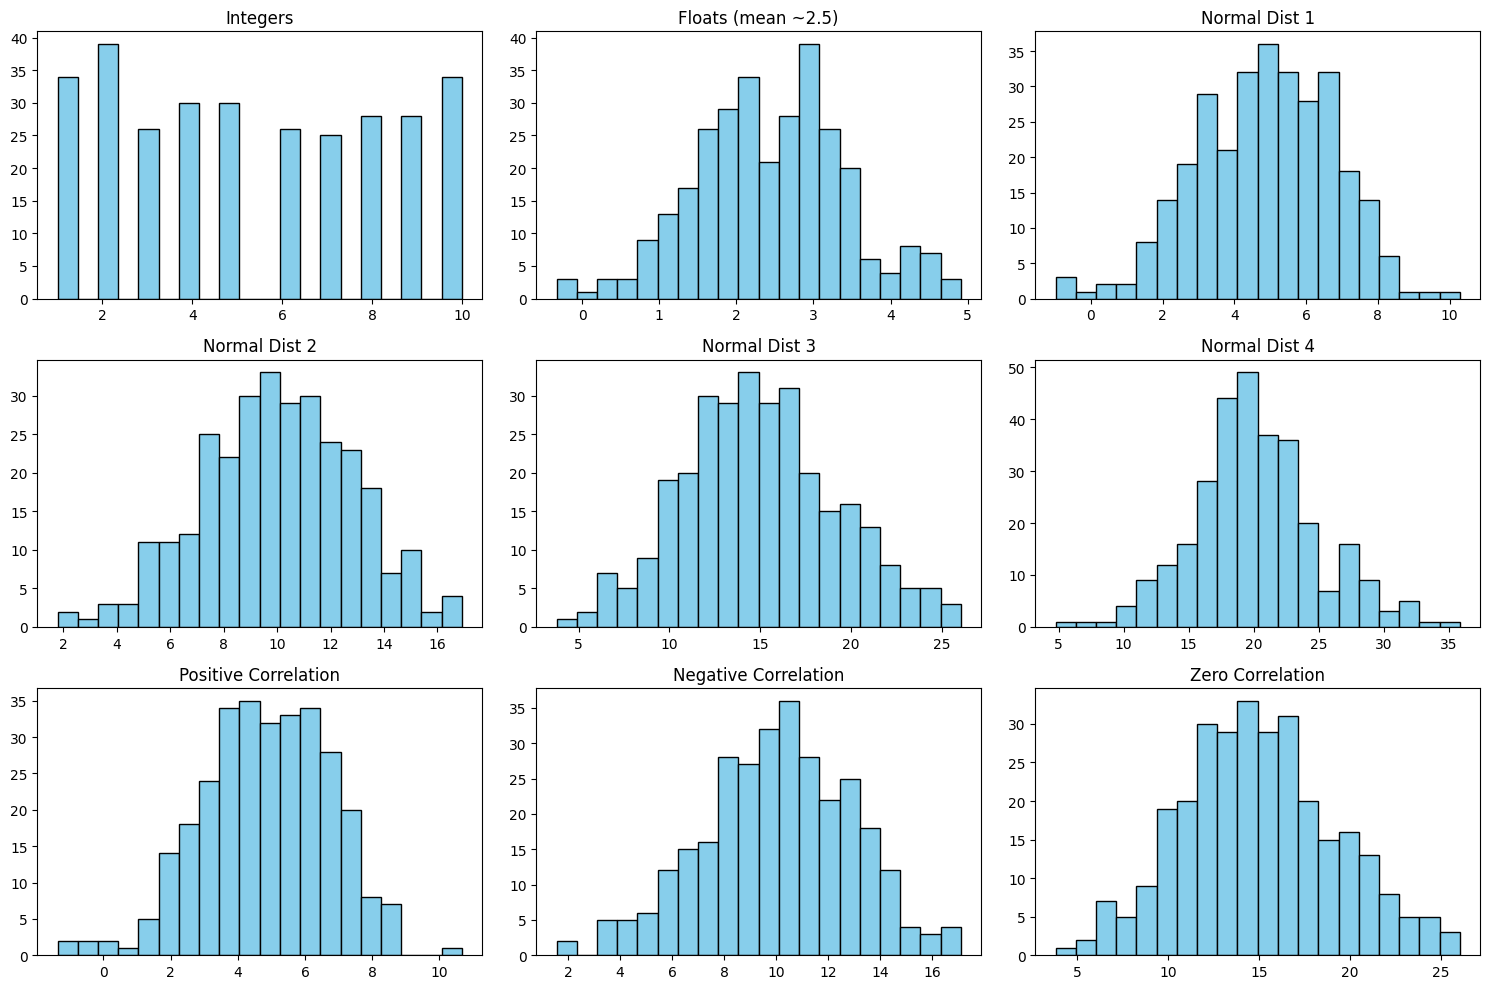

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dataset with specific requirements
def generate_artificial_dataset():
    # Initialize random seed for reproducibility
    random.seed(0)
    np.random.seed(0)

    # Generate 300 data points with 6 columns
    data = []
    for _ in range(300):
        row = [
            random.randint(1, 10),  # Integer column
            np.random.normal(2.5, 1),  # Float column with mean close to 2.5
            np.random.normal(5, 2),  # Different mean and std dev
            np.random.normal(10, 3),  # Different mean and std dev
            np.random.normal(15, 4),  # Different mean and std dev
            np.random.normal(20, 5),  # Different mean and std dev
        ]
        data.append(row)

    # Add correlation between some columns
    for row in data:
        row.append(row[2] + np.random.normal(0, 0.5))  # Positively correlated with column 3
        row.append(row[3] - np.random.normal(0, 0.5))  # Negatively correlated with column 4
        row.append(row[4] + np.random.normal(0, 0))    # Correlation close to 0 with column 5

    # Save the dataset to a CSV file
    with open('artificial_dataset.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)
    
    return data

# Function to visualize the dataset
def visualize_dataset(data):
    # Convert data to a numpy array for easier slicing
    data_array = np.array(data)
    
    # Create histograms for each column
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Adjust the subplot grid as needed
    columns = ['Integers', 'Floats (mean ~2.5)', 'Normal Dist 1', 'Normal Dist 2', 'Normal Dist 3', 'Normal Dist 4', 'Positive Correlation', 'Negative Correlation', 'Zero Correlation']
    for i, ax in enumerate(axs.flatten()):
        if i < len(columns):
            ax.hist(data_array[:, i], bins=20, color='skyblue', edgecolor='black')
            ax.set_title(columns[i])
        else:
            ax.axis('off')  # Hide unused subplots

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function to generate the dataset
data = generate_artificial_dataset()

# Visualize the dataset
visualize_dataset(data)
